# MOVIE RATING INSIGHTS

## Reading from sample data

In [3]:
import pandas as pd

# Sample movies dataset
movies = pd.read_excel("C:\\Users\\admin\\Downloads\\movies.xlsx")

# Sample ratings dataset
ratings = pd.read_excel("C:\\Users\\admin\\Downloads\\ratings.xlsx")
print("Movies Data:")
print(movies.head())
print("\nRatings Data:")
print(ratings.head())



Movies Data:
   movie_id          title
0         1     The Matrix
1         2      Inception
2         3   Interstellar
3         4       The Room
4         5  The Godfather

Ratings Data:
   user_id  movie_id  rating
0      101         1       5
1      102         1       4
2      103         1       5
3      101         2       5
4      102         2       4


## Analyze Average Ratings per movie

In [4]:
# Merge ratings with movies to get titles
merged = pd.merge(ratings, movies, on='movie_id')

# Calculate average rating per movie
average_ratings = merged.groupby('title')['rating'].mean().sort_values(ascending=False)

print("🎬 Average Ratings per Movie:")
print(average_ratings)


🎬 Average Ratings per Movie:
title
The Godfather    5.000000
The Matrix       4.666667
Inception        4.500000
Interstellar     3.500000
The Room         1.000000
Name: rating, dtype: float64


## Top Rated & Worst Rated Movies

In [5]:
print("\n🏆 Top Rated Movie(s):")
top_rating = average_ratings.max()
print(average_ratings[average_ratings == top_rating])

print("\n Worst Rated Movie(s):")
lowest_rating = average_ratings.min()
print(average_ratings[average_ratings == lowest_rating])



🏆 Top Rated Movie(s):
title
The Godfather    5.0
Name: rating, dtype: float64

 Worst Rated Movie(s):
title
The Room    1.0
Name: rating, dtype: float64


## Most Rated Movies

In [6]:
rating_counts = merged.groupby('title')['rating'].count().sort_values(ascending=False)
print("\n📊 Most Rated Movies:")
print(rating_counts)



📊 Most Rated Movies:
title
The Matrix       3
Inception        2
Interstellar     2
The Godfather    2
The Room         1
Name: rating, dtype: int64


## User Rating of a Movie

In [7]:
def rate_movie(user_id, movie_title, user_rating):
    # Find movie ID
    movie = movies[movies['title'] == movie_title]
    if movie.empty:
        print("Movie not found.")
        return
    movie_id = movie.iloc[0]['movie_id']
    
    # Add to ratings
    global ratings
    new_rating = pd.DataFrame({'user_id': [user_id], 'movie_id': [movie_id], 'rating': [user_rating]})
    ratings = pd.concat([ratings, new_rating], ignore_index=True)
    print(f"✅ Added rating {user_rating} for '{movie_title}' by User {user_id}")

# Simulate user rating
rate_movie(106, 'Inception', 5)


✅ Added rating 5 for 'Inception' by User 106


## Visualization

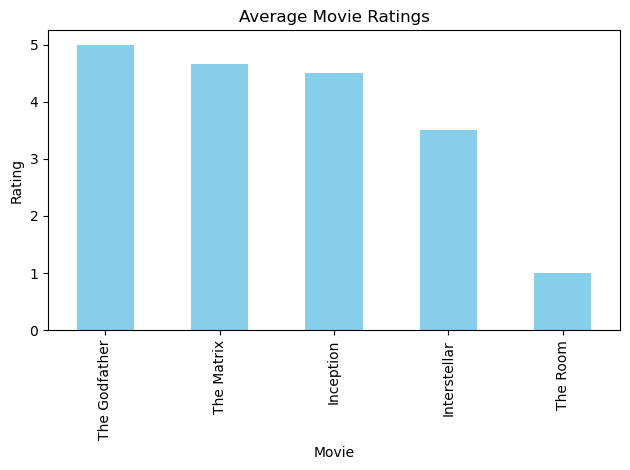

In [8]:
import matplotlib.pyplot as plt

# Plot average ratings
average_ratings.plot(kind='bar', title='Average Movie Ratings', color='skyblue')
plt.ylabel('Rating')
plt.xlabel('Movie')
plt.tight_layout()
plt.show()
